<a href="https://colab.research.google.com/github/yoshi1220/iris_classification_notebook/blob/master/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# あやめの花の分類を色々な方法で行う

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# サンプルデータの読み込み
iris_dataset = load_iris()

print(iris_dataset.data.shape)
print(iris_dataset.target.shape)

(150, 4)
(150,)


In [0]:


# 訓練データと識別データに分割する
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, 
                                                    iris_dataset.target, 
                                                    test_size=0.3, 
                                                    random_state=0)

## k-最近傍法での予測

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(score)

0.9777777777777777


## ロジスティック回帰での予測

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10)
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)
print(score)

0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## サポートベクターマシンによる予測

In [0]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)
print(score)

0.9777777777777777


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 決定木での予測

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
score = tree.score(X_test, y_test)
print(score)

0.9111111111111111


## ディープラーニング（４層ニューラルネットワーク）による予測

In [0]:
from sklearn import preprocessing
from keras.utils import np_utils

# データの標準化
scaler = preprocessing.StandardScaler()
scaler.fit(iris_dataset.data)

X = scaler.transform(iris_dataset.data)
y = np_utils.to_categorical(iris_dataset.target)

print(X.shape)
print(y.shape)

(150, 4)
(150, 3)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# 訓練データと識別データに分割する
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

# ニューラネットワークの作成
model = Sequential()

# 最初の入力層と中間層の作成
model.add(Dense(32, input_dim=4)) # 中間層のニューロンの数が32, 入力のニューロンの数が4
# 活性化関数の追加
model.add(Activation('relu')) 

# 中間層の追加
model.add(Dense(32))
model.add(Activation('relu'))

# 出力層の追加
model.add(Dense(3)) # targetの列数と同じにする
model.add(Activation('softmax')) # 出力が確率を表す

# モデルのコンパイル
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# コンパイルしたモデルのサマリー
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_10 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_11 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_12 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

In [0]:
trained_model = model.fit(X_train, y_train, nb_epoch=100, batch_size=8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
105/105 [==============================] - 0s 2ms/step - loss: 1.0663 - acc: 0.3810
Epoch 2/100
105/105 [==============================] - 0s 192us/step - loss: 1.0003 - acc: 0.5333
Epoch 3/100
105/105 [==============================] - 0s 210us/step - loss: 0.9381 - acc: 0.6095
Epoch 4/100
105/105 [==============================] - 0s 214us/step - loss: 0.8838 - acc: 0.6476
Epoch 5/100
105/105 [==============================] - 0s 206us/step - loss: 0.8332 - acc: 0.6571
Epoch 6/100
105/105 [==============================] - 0s 218us/step - loss: 0.7872 - acc: 0.6952
Epoch 7/100
105/105 [==============================] - 0s 246us/step - loss: 0.7466 - acc: 0.7048
Epoch 8/100
105/105 [==============================] - 0s 198us/step - loss: 0.7106 - acc: 0.7905
Epoch 9/100
105/105 [==============================] - 0s 229us/step - loss: 0.6800 - acc: 0.8095
Epoch 10/100
105/105 [==============================] - 0s 217us/step - loss: 0.6522 - acc: 0.8286
Epoch 11/100
105/105 

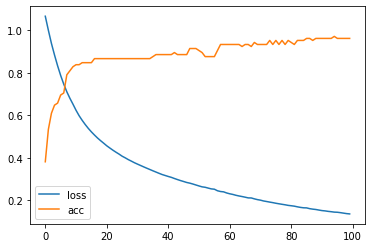

In [0]:
import matplotlib.pyplot as plt
import numpy as np

hist_loss = trained_model.history['loss']
hist_acc = trained_model.history['acc']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='acc')
plt.legend()
plt.show()

In [0]:
_, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

45/45 [==============================] - 0s 1ms/step
0.9777777791023254
